# Final Project - Quality of Bananas

Carlo Pezzotti - Kushtrim Rushi
Link al dataset: [Quality of Bananas](https://www.kaggle.com/code/nikhilvagala/banana-quality-with-98)

## Descrizione del dataset

Questo dataset contiene informazioni sulle caratteristiche delle banane, raccolte attraverso osservazioni e test di laboratorio. Le variabili registrate includono misurazioni fisiche come dimensione, peso e morbidezza, nonché attributi qualitativi come dolcezza, acidità e maturità. L'obiettivo principale è quello di predire la qualità delle banane in base alle loro caratteristiche fisiche e chimiche.

## Struttura del dataset

Il dataset è strutturato in colonne che rappresentano diverse caratteristiche delle banane e una colonna finale che indica la qualità della banana. Ecco una panoramica delle colonne:

- **Size**: La dimensione della banana, espressa in un valore numerico.
- **Weight**: Il peso della banana, misurato in unità di massa.
- **Sweetness**: La dolcezza della banana, misurata su una scala numerica.
- **Softness**: La morbidezza della banana, rappresentata da un valore numerico.
- **HarvestTime**: Il momento del raccolto della banana, rappresentato da un valore numerico.
- **Ripeness**: Il grado di maturità della banana al momento del test, misurato su una scala numerica.
- **Acidity**: L'acidità della banana, espressa in un valore numerico.
- **Quality**: La qualità della banana, rappresentata da una variabile categorica con due livelli: 'Good' e 'Bad'.

## Utilizzo del dataset

Questo dataset può essere utilizzato per sviluppare modelli predittivi per determinare la qualità delle banane in base alle loro caratteristiche fisiche e chimiche. Ad esempio, è possibile addestrare modelli di classificazione per predire se una banana è di buona qualità o meno in base alle sue misurazioni. Inoltre, il dataset potrebbe essere utilizzato per analizzare le relazioni tra le diverse variabili e identificare quali caratteristiche influenzano maggiormente la qualità delle banane.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.calibration import cross_val_predict

# Caricamento del dataset
data = pd.read_csv("banana.csv")
'''
SAMPLE:

Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
-1.9249682,0.46807805,3.0778325,-1.4721768,0.2947986,2.4355695,0.27129033,Good
-2.4097514,0.48686993,0.34692144,-2.4950993,-0.8922133,2.0675488,0.30732512,Good
'''

# Dividere il dataset in features e target
X = data.drop('Quality', axis=1)
y = data['Quality']

# Quality if Good = 1, Bad = 0
y = y.replace('Good', 1)
y = y.replace('Bad', 0)


/var/folders/dx/b33581kd6p5374x5skx1wvkm0000gn/T/ipykernel_4389/3628385230.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace('Bad', 0)


In [5]:
# Suddivisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

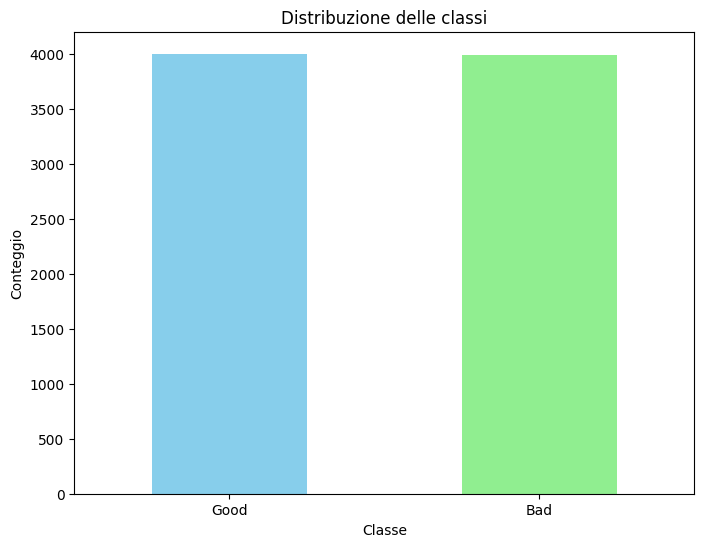

In [33]:
# Conteggio delle classi
class_counts = data['Quality'].value_counts()

# Plot della distribuzione delle classi
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribuzione delle classi')
plt.xlabel('Classe')
plt.ylabel('Conteggio')
plt.xticks(rotation=0)
plt.show()

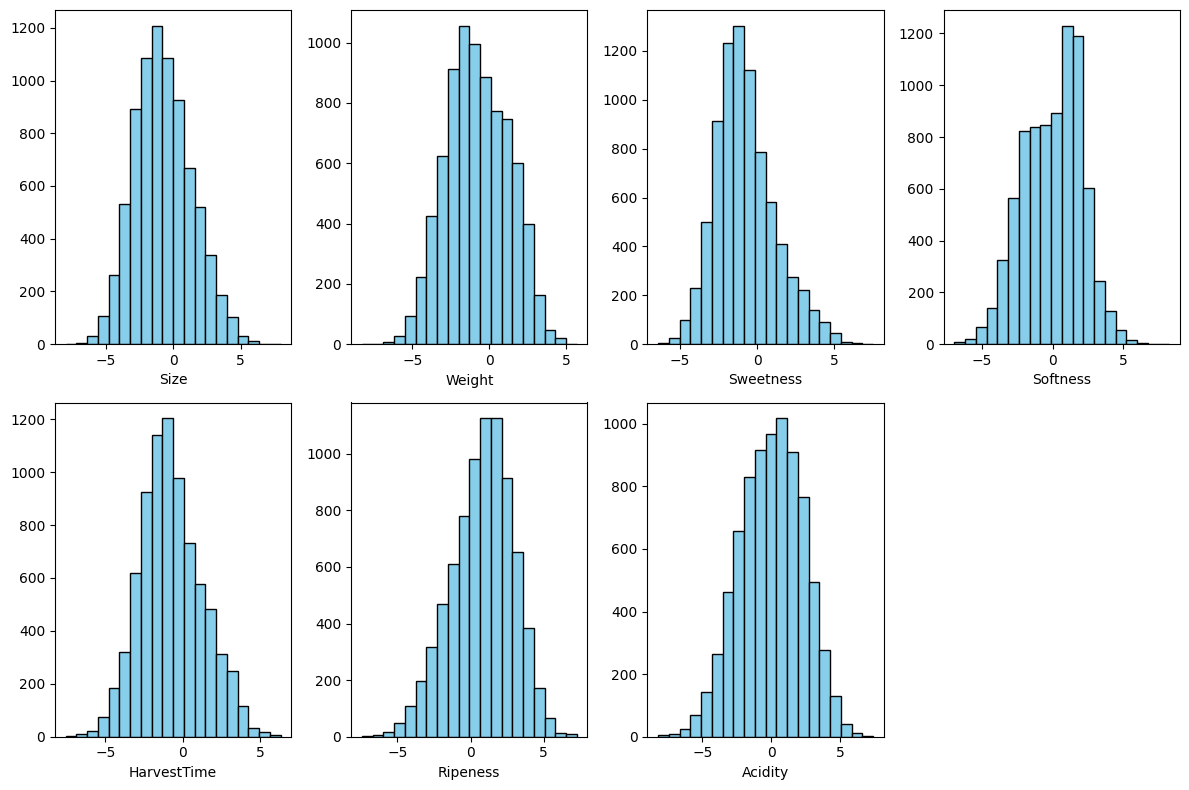

In [28]:
# Visualizzazione della distribuzione delle caratteristiche
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(2, 4, i+1)
    plt.hist(data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


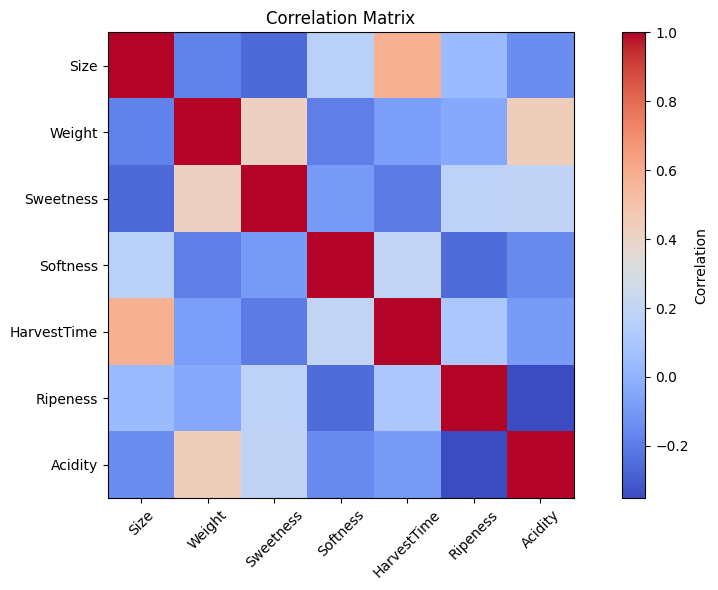

In [34]:
numeric_data = data.drop('Quality', axis=1)
correlation_matrix = numeric_data.corr()

# Visualizzazione della matrice di correlazione
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title("Correlation Matrix")
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.tight_layout()  # Aggiunge spaziatura tra le etichette sull'asse x e y per una migliore leggibilità
plt.show()


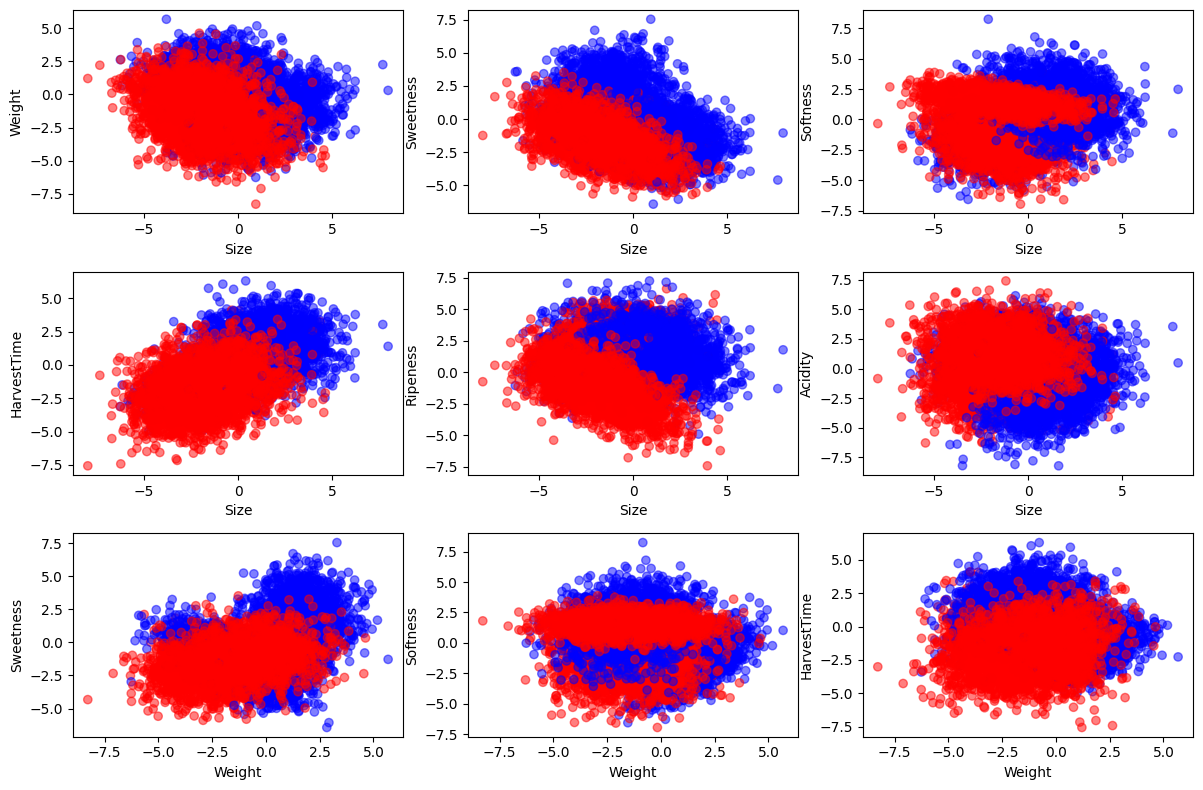

In [31]:
from itertools import combinations

# Scatterplot tra le caratteristiche
plt.figure(figsize=(12, 8))
features_combinations = list(combinations(data.columns[:-1], 2))
num_plots = min(len(features_combinations), 9)
for i in range(num_plots):
    plt.subplot(3, 3, i + 1)
    feature1, feature2 = features_combinations[i]
    plt.scatter(data[feature1], data[feature2], c=data['Quality'].map({'Good': 'blue', 'Bad': 'red'}), alpha=0.5)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
plt.tight_layout()
plt.show()

In [6]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_classifier = grid_search_rf.best_estimator_
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [7]:
# Print the most important features in descending order
print("Features importance:")
feature_importance = zip(X.columns, best_rf_classifier.feature_importances_)
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
for name, score in sorted_feature_importance:
    print(name, score)


Features importance:
Sweetness 0.16361659564955935
Weight 0.16088630684657887
Size 0.15630979728554933
HarvestTime 0.1539527198218554
Ripeness 0.14381394803388986
Softness 0.13919843268485704
Acidity 0.08222219967771016


In [8]:
# Support Vector Machine
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid_svm = {
    'C': [0.1, 1],
    'gamma': [0.1, 1]
}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)
best_svm_classifier = grid_search_svm.best_estimator_
best_svm_classifier.fit(X_train_scaled, y_train)

SVC(C=1, gamma=1, random_state=42)

In [9]:
# K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn_classifier = grid_search_knn.best_estimator_
best_knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=9)

In [10]:
# Calcolo della confusion matrix e F1-score per i modelli ottimizzati
rf_y_pred = best_rf_classifier.predict(X_test)
svm_y_pred = best_svm_classifier.predict(X_test_scaled)
knn_y_pred = best_knn_classifier.predict(X_test_scaled)

rf_cm = confusion_matrix(y_test, rf_y_pred)
svm_cm = confusion_matrix(y_test, svm_y_pred)
knn_cm = confusion_matrix(y_test, knn_y_pred)

rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')

print("Random Forest F1-score:", rf_f1)
print("SVM F1-score:", svm_f1)
print("KNN F1-score:", knn_f1)

#print accuracy
rf_accuracy = best_rf_classifier.score(X_test, y_test)
svm_accuracy = best_svm_classifier.score(X_test_scaled, y_test)
knn_accuracy = best_knn_classifier.score(X_test_scaled, y_test)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)

Random Forest F1-score: 0.9749974199238174
SVM F1-score: 0.9837489328584228
KNN F1-score: 0.9799986865949819
Random Forest Accuracy: 0.975
SVM Accuracy: 0.98375
KNN Accuracy: 0.98


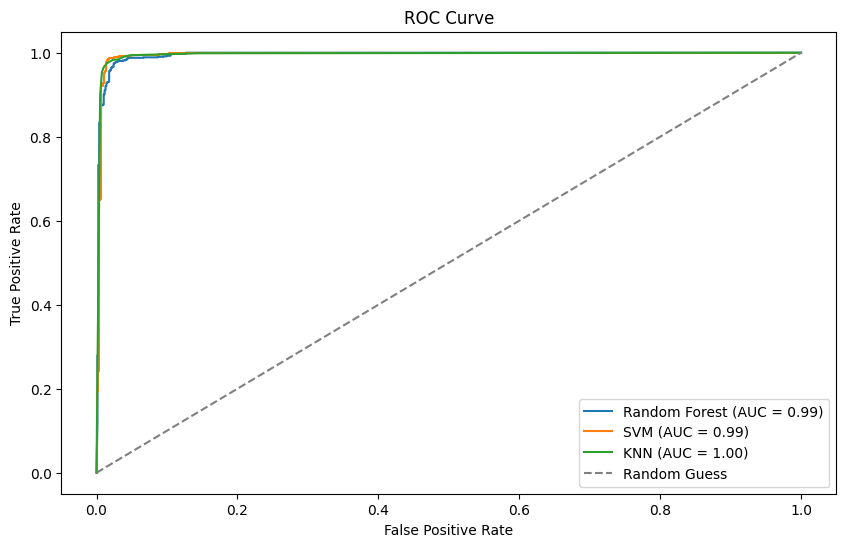

In [27]:
# Calcolare le probabilità predette per i modelli ottimizzati
rf_probs = best_rf_classifier.predict_proba(X_test)[:, 1]
svm_probs = best_svm_classifier.decision_function(X_test_scaled)
knn_probs = best_knn_classifier.predict_proba(X_test_scaled)[:, 1]

# Calcolare i tassi di falsi positivi e veri positivi per i classificatori
# Calcolare i tassi di falsi positivi e veri positivi per i classificatori
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=1)  # Assuming the positive class is labeled as 1
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs, pos_label=1)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs, pos_label=1)


# Calcolare l'Area Under the Curve (AUC) per i classificatori
rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
knn_auc = auc(knn_fpr, knn_tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [17]:
#create a banana using -1.9652935,-0.06748736,2.6001945,-1.7930973,-1.6579864,1.0869076,2.335015,Good
new_banana = pd.DataFrame({
    'Size': [-1.9652935],
    'Weight': [-0.06748736],
    'Sweetness': [2.6001945],
    'Softness': [-1.7930973],
    'HarvestTime': [-1.6579864],
    'Ripeness': [1.0869076],
    'Acidity': [2.335015]
})

print("\nNew banana:")
print(new_banana)


# Predizione utilizzando Random Forest
rf_prediction = best_rf_classifier.predict(new_banana)
print("Random Forest prediction:", rf_prediction)

# Predizione utilizzando Support Vector Machine
svm_prediction = best_svm_classifier.predict(scaler.transform(new_banana))
print("SVM prediction:", svm_prediction)

# Predizione utilizzando K-Nearest Neighbors
knn_prediction = best_knn_classifier.predict(scaler.transform(new_banana))
print("KNN prediction:", knn_prediction)


New banana:
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity
0 -1.965294 -0.067487   2.600195 -1.793097    -1.657986  1.086908  2.335015
Random Forest prediction: [1]
SVM prediction: [1]
KNN prediction: [1]
